## Visualizing the embeddings in 2D

We will use t-SNE to reduce the dimensionality of the embeddings from 1536 to 2. Once the embeddings are reduced to two dimensions, we can plot them in a 2D scatter plot. The dataset is created in the [Obtain_dataset Notebook](Obtain_dataset.ipynb).

### 1. Reduce dimensionality

We reduce the dimensionality to 2 dimensions using t-SNE decomposition.

In [17]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
from ast import literal_eval

# Load the embeddings
datafile_path = "fine_food_reviews_with_embeddings_1k.csv"
df = pd.read_csv(datafile_path)
# Templates For Projects/ChatGPT Embeddings Demo/fine_food_reviews_with_embeddings_1k.csv

In [18]:

# Convert to a list of lists of floats
matrix = np.array(df.embedding.apply(literal_eval).to_list())
matrix


array([[ 7.01807206e-03, -2.73165479e-02,  1.05734831e-02, ...,
        -7.01120170e-03, -2.18614824e-02, -3.75671238e-02],
       [-3.14055197e-03, -9.99566447e-03, -3.48033849e-03, ...,
        -9.74494778e-03, -2.39829952e-03, -9.20392852e-03],
       [-1.75724812e-02, -8.26651158e-05, -1.15222773e-02, ...,
        -1.39020244e-02, -3.90170924e-02, -2.35151257e-02],
       ...,
       [-9.74910241e-03, -6.87123602e-03, -5.70622832e-03, ...,
        -3.00459806e-02, -8.14515445e-03, -1.95114054e-02],
       [-5.21062920e-03,  9.60669015e-04,  2.82862745e-02, ...,
        -5.38039953e-03, -1.33138765e-02, -2.71892995e-02],
       [-6.05782261e-03, -1.50158405e-02, -2.07575737e-03, ...,
        -2.90671214e-02, -1.41164539e-02, -2.28756946e-02]])

In [19]:
# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)
vis_dims.shape


(1000, 2)

### 2. Plotting the embeddings

We colour each review by its star rating, ranging from red to green.

We can observe a decent data separation even in the reduced 2 dimensions.

Text(0.5, 1.0, 'Amazon ratings visualized in language using t-SNE')

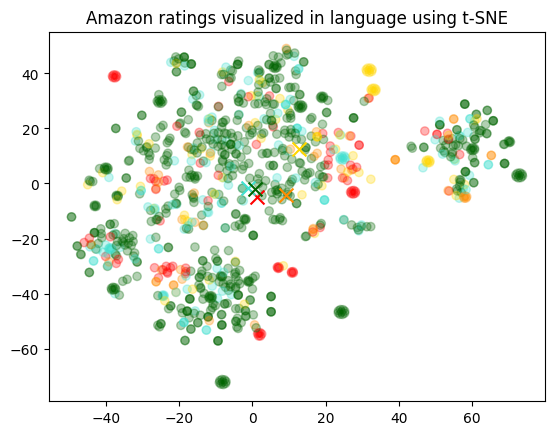

In [20]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
color_indices = df.Score.values - 1

colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
for score in [0,1,2,3,4]:
    avg_x = np.array(x)[df.Score-1==score].mean()
    avg_y = np.array(y)[df.Score-1==score].mean()
    color = colors[score]
    plt.scatter(avg_x, avg_y, marker='x', color=color, s=100)

plt.title("Amazon ratings visualized in language using t-SNE")

